In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
# import matplotlib.pyplot as plt
import gmplot as gm
import folium

In [6]:
df = pd.read_csv('vélib_batch_parheure.csv', delimiter=',', encoding='utf-8')
df.head()

,Timer,ID,Station,Code Station,Carte de crédit,Etat de la station,Nb bornes disponibles,Nombres de bornes en station,Nombre vélo en PARK+,Nb vélo mécanique,Nb vélo électrique,Etat kiosque,Overflowactivation,geo
0,2020-02-08 12:44:01,c7a1c1e44ec587f87c3720194d233ee810b39f31,Benjamin Godard - Victor Hugo,16107,no,Operative,32,35,0,0,3,yes,no,"[48.865983, 2.275725]"
1,2020-02-08 12:44:01,c263109478c84e55930589965b3ade244c508664,André Mazet - Saint-André des Arts,6015,yes,Operative,46,52,0,5,1,yes,no,"[48.85375581057431, 2.3390958085656166]"
2,2020-02-08 12:44:01,2524a6123f5863d6975a33717b957299283c7fb3,Charonne - Robert et Sonia Delauney,11104,no,Operative,6,20,0,6,8,yes,no,"[48.85590755596891, 2.3925706744194035]"
3,2020-02-08 12:44:01,31b9f9af5d0407450fa9f99f76accec3b15252b8,Toudouze - Clauzel,9020,yes,Operative,20,21,0,0,0,yes,no,"[48.87929591733507, 2.3373600840568547]"
4,2020-02-08 12:44:01,ee7da0f6b2423c291639ecf290b60bb757464517,Mairie du 12ème,12109,no,Operative,5,30,0,20,5,yes,no,"[48.84085531176338, 2.3875549435615544]"


In [24]:
eval(df.loc[0]['geo'])[0]

48.865983

In [25]:
points = df.apply(lambda row: Point(eval(row.geo)[1], eval(row.geo)[0]), axis=1)
points.head()

0                     POINT (2.275725 48.865983)
1    POINT (2.339095808565617 48.85375581057431)
2    POINT (2.392570674419404 48.85590755596891)
3    POINT (2.337360084056855 48.87929591733507)
4    POINT (2.387554943561554 48.84085531176338)
dtype: object

In [40]:
gdf = gpd.GeoDataFrame(df, geometry=points)
gdf.crs = {'init':'epsg:4326'}
gdf.head()

,Timer,ID,Station,Code Station,Carte de crédit,Etat de la station,Nb bornes disponibles,Nombres de bornes en station,Nombre vélo en PARK+,Nb vélo mécanique,Nb vélo électrique,Etat kiosque,Overflowactivation,geo,geometry
0,2020-02-08 12:44:01,c7a1c1e44ec587f87c3720194d233ee810b39f31,Benjamin Godard - Victor Hugo,16107,no,Operative,32,35,0,0,3,yes,no,"[48.865983, 2.275725]",POINT (2.27572 48.86598)
1,2020-02-08 12:44:01,c263109478c84e55930589965b3ade244c508664,André Mazet - Saint-André des Arts,6015,yes,Operative,46,52,0,5,1,yes,no,"[48.85375581057431, 2.3390958085656166]",POINT (2.33910 48.85376)
2,2020-02-08 12:44:01,2524a6123f5863d6975a33717b957299283c7fb3,Charonne - Robert et Sonia Delauney,11104,no,Operative,6,20,0,6,8,yes,no,"[48.85590755596891, 2.3925706744194035]",POINT (2.39257 48.85591)
3,2020-02-08 12:44:01,31b9f9af5d0407450fa9f99f76accec3b15252b8,Toudouze - Clauzel,9020,yes,Operative,20,21,0,0,0,yes,no,"[48.87929591733507, 2.3373600840568547]",POINT (2.33736 48.87930)
4,2020-02-08 12:44:01,ee7da0f6b2423c291639ecf290b60bb757464517,Mairie du 12ème,12109,no,Operative,5,30,0,20,5,yes,no,"[48.84085531176338, 2.3875549435615544]",POINT (2.38755 48.84086)


In [35]:
arrondissements = gpd.read_file("Arrondissements/arrondissements.shp", encoding='utf-8')
arrondissements.to_crs(epsg=4326)

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,objectid,longueur,geometry
0,750000011.0,11.0,75111.0,11ème Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,11.0,8281.635288,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
1,750000013.0,13.0,75113.0,13ème Ardt,Gobelins,750001537.0,7.149311e+06,11546.546526,13.0,11545.686986,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
2,750000010.0,10.0,75110.0,10ème Ardt,Entrepôt,750001537.0,2.891739e+06,6739.375055,10.0,6739.168359,"POLYGON ((2.36469 48.88437, 2.36485 48.88436, ..."
3,750000016.0,16.0,75116.0,16ème Ardt,Passy,750001537.0,1.637254e+07,17416.109657,16.0,17415.326726,"POLYGON ((2.27427 48.87837, 2.27749 48.87796, ..."
4,750000005.0,5.0,75105.0,5ème Ardt,Panthéon,750001537.0,2.539375e+06,6239.195396,5.0,6238.823408,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."
5,750000006.0,6.0,75106.0,6ème Ardt,Luxembourg,750001537.0,2.153096e+06,6483.686786,6.0,6483.324560,"POLYGON ((2.34459 48.85405, 2.34428 48.85375, ..."
6,750000012.0,12.0,75112.0,12ème Ardt,Reuilly,750001537.0,1.631478e+07,24089.666298,12.0,24088.038922,"POLYGON ((2.41388 48.83357, 2.41401 48.83357, ..."
7,750000015.0,15.0,75115.0,15ème Ardt,Vaugirard,750001537.0,8.494994e+06,13678.798315,15.0,13677.923661,"POLYGON ((2.29932 48.85217, 2.30088 48.85118, ..."
8,750000003.0,3.0,75103.0,3ème Ardt,Temple,750001537.0,1.170883e+06,4519.263648,3.0,4519.071982,"POLYGON ((2.36383 48.86750, 2.36389 48.86747, ..."
9,750000001.0,1.0,75101.0,1er Ardt,Louvre,750001537.0,1.824613e+06,6054.936862,1.0,6054.680862,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."


In [50]:
gdf.rename(columns={col:col.replace(' ', '_').replace('+', '') for col in gdf.columns.to_list()}, inplace=True)
gdf.columns

Index(['Timer', 'ID', 'Station', 'Code_Station', 'Carte_de_crédit',
       'Etat_de_la_station', 'Nb_bornes_disponibles',
       'Nombres_de_bornes_en_station', 'Nb_vélo_en_PARK', 'Nb_vélo_mécanique',
       'Nb_vélo_électrique', 'Etat_kiosque', 'Overflowactivation', 'geo',
       'geometry'],
      dtype='object')

In [53]:
gdf["Nb_vélo_disp"] = gdf.apply(lambda row: row.Nb_vélo_en_PARK + row.Nb_vélo_mécanique + row.Nb_vélo_électrique, axis=1)
gdf.head()

,Timer,ID,Station,Code_Station,Carte_de_crédit,Etat_de_la_station,Nb_bornes_disponibles,Nombres_de_bornes_en_station,Nb_vélo_en_PARK,Nb_vélo_mécanique,Nb_vélo_électrique,Etat_kiosque,Overflowactivation,geo,geometry,Nb_vélo_disp
0,2020-02-08 12:44:01,c7a1c1e44ec587f87c3720194d233ee810b39f31,Benjamin Godard - Victor Hugo,16107,no,Operative,32,35,0,0,3,yes,no,"[48.865983, 2.275725]",POINT (2.27572 48.86598),3
1,2020-02-08 12:44:01,c263109478c84e55930589965b3ade244c508664,André Mazet - Saint-André des Arts,6015,yes,Operative,46,52,0,5,1,yes,no,"[48.85375581057431, 2.3390958085656166]",POINT (2.33910 48.85376),6
2,2020-02-08 12:44:01,2524a6123f5863d6975a33717b957299283c7fb3,Charonne - Robert et Sonia Delauney,11104,no,Operative,6,20,0,6,8,yes,no,"[48.85590755596891, 2.3925706744194035]",POINT (2.39257 48.85591),14
3,2020-02-08 12:44:01,31b9f9af5d0407450fa9f99f76accec3b15252b8,Toudouze - Clauzel,9020,yes,Operative,20,21,0,0,0,yes,no,"[48.87929591733507, 2.3373600840568547]",POINT (2.33736 48.87930),0
4,2020-02-08 12:44:01,ee7da0f6b2423c291639ecf290b60bb757464517,Mairie du 12ème,12109,no,Operative,5,30,0,20,5,yes,no,"[48.84085531176338, 2.3875549435615544]",POINT (2.38755 48.84086),25


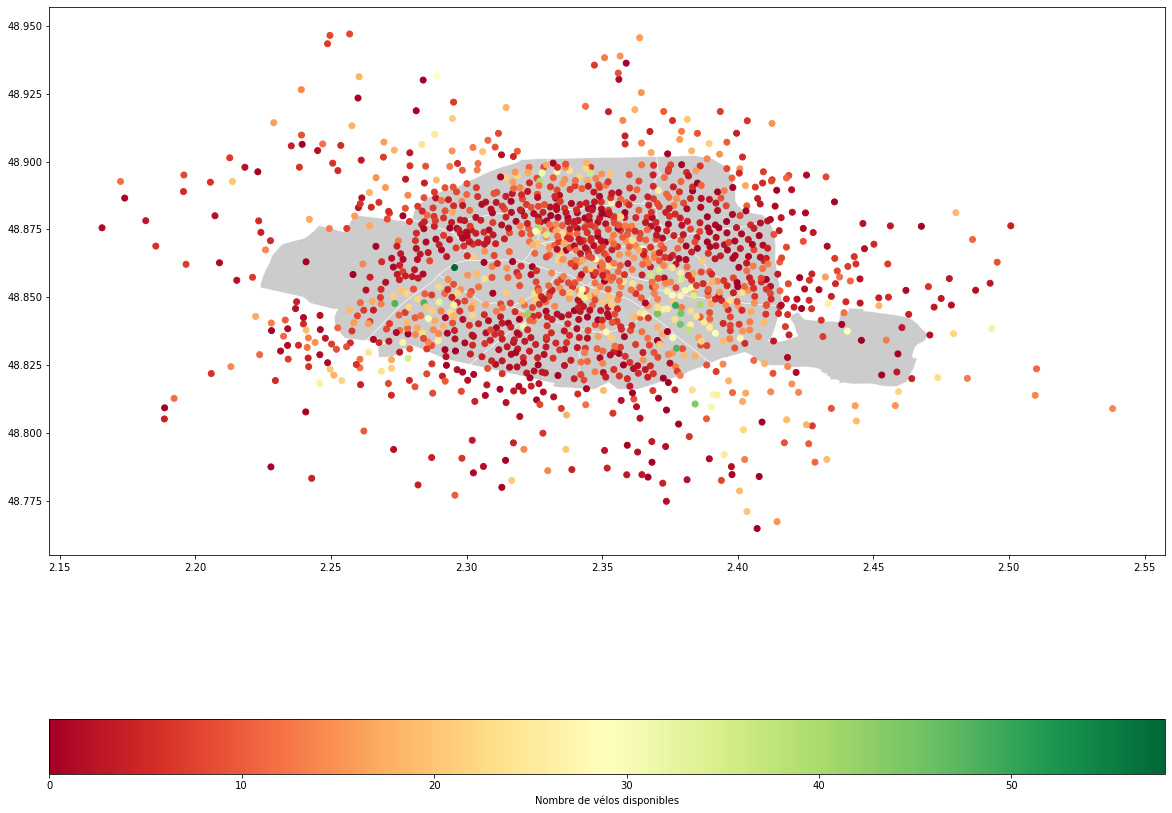

In [64]:
Paris = arrondissements.plot(figsize=(20,20), color='#CCCCCC', edgecolor='#FFFFFF', linewidth=0.5)
gdf.plot(ax=Paris, column=gdf["Nb_vélo_disp"], legend=True, legend_kwds={'orientation':'horizontal', 'label':'Nombre de vélos disponibles'}, cmap='RdYlGn')